### <p style="text-align: right;"> &#9989; Andrew Wilt</p>

# Homework Assignment #3 (Individual)
Goals for this homework assignment

By the end of this assignment, you should be able to:
- Continue developing functions to break down the steps in solving a problem
- Work with multi-dimensional arrays
- Improve your skills in using numpy
- Get some basic experience with Image Processing
- Learn about Steganography

### Assignment instructions

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

There are **25 points** possible on this assignment. Point values for each part are included in the section headers.

This assignment is due at **11:59 pm on Monday, February 24**. It should be uploaded into the "Homework Assignments" submission folder for Homework #3. Submission instructions can be found at the end of the notebook.


---
## 1. Before you begin: Add to your Git repository to track your progress on your assignment (3 points)

For this assignment, you're going to add it to the `cmse202-S20-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to:

1. Navigate to your `cmse202-s20-turnin` repository and create a new directory called `hw-03`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
1. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Make sure you've added your TA as collaborators to your "turnin" respository with "Read" access so that we can see your assignment.

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s20-turnin`" repository inside the `hw-03` directory that you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

---
## 2. Digital Images

The video below can help you remember a bit about how a digital image is represented

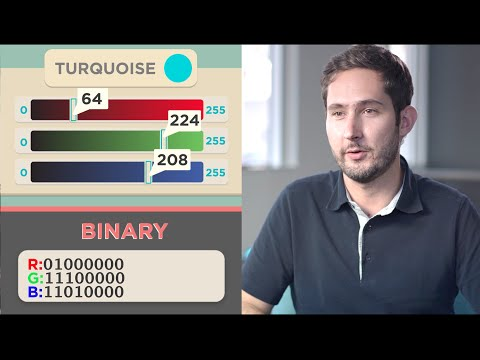

In [30]:
from IPython.display import YouTubeVideo
YouTubeVideo("15aqFQQVBWU",width=640,height=360)

Some important aspects of digital images (with respect to display on a video screen specifically):

An image is represented as a matrix of values where each value represents the display content for an individual pixel on a digital screen
- the dimensions of the matrix are the dimensions of the pixels that constitute image. That is, each value maps to a particular pixel
- If the image is a *greyscale* image (no color, only shades of grey), then we use 2D matrix where the 2D location is the location of the pixel in the image and the value at that 2D location is greyscale value. Greyscale values range between 0-255, where 0 is black and 255 is white. Each pixel takes on a greyscale value based on those integer values
- If the image is a *color* image, then (typically) the array is a 3D matrix where the third dimension has three values representing the red, green and blue content of that pixel. Each color *channel* takes on a value between 0-255

Images below from https://ai.stanford.edu/~syyeung/cvweb/tutorial1.html

<table> <tr> 
    <td> <img src="https://i.imgur.com/4jDEygv.png" width=500> </td> 
    <td> <img src="https://i.imgur.com/1jwpnE1.png"> </td> 
</tr> </table>

### 2.1 Working with Images in Python (3 points)

It turns out that there are a number of ways to work in an image in Python. However, too many choices can make things confusing so I'm going to pick a particular approach. Feel free to explore others.

There is an imaging library know as `PIL` (caps matter here). What's weird about `PIL` is that it represents an old library that was abandoned but later picked up (forked to be computer-sciencey) under the name *pillow* . However, `pillow` is imported using the old name `PIL` to maintain compatibiliy with old code. So you have to be careful that you have `pillow` as a library even though we still `import PIL`. Anaconda has done that for us but it is good to know, especially if you look up reference material (which should be under *pillow*, not *PIL*). Get all that?

There are only a couple of aspects we need of pillow/PIL for our work, and here they are:

- we would really like to use the `Image` class in `PIL`, so we need to `import Image from PIL`. Again, caps matter here
- the `Image.open(filename)` will return an `Image` instance from an image file, assuming it can find the file
- if you create an `Image` instance, let's call it `img`, then `img.show()` should display the image. (Note: it should pop up a window outside of your notebook)
- to gather the underlying matrix from the image instance `img`, you can use `numpy` (which you obviously have to import), as in `numpy.asarray(img)`
- to create an image instance from a matrix, you can do `Image.fromarray(yourarray)`
- to convert an image from greyscale to RGB(color) you use the `.convert` method. 
   - `img.convert('L')` ("L" for luminosity) returns a greyscale image. 
   - `img.convert('RGB')` returns a color image

There are clearly lots of other things you can do, but this should get us started. 

In [116]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


### Exercise, 3 pts

I provide a little image for us to work with from https://en.wikipedia.org/wiki/Kernel_(image_processing). I named the image `oscar.png` (he looks like an oscar). Write code to do the following:

1. open `oscar.png` as described
1. display the image (should be in color)
1. get the underlying matrix from the greyscale image and print its shape
1. change the middle pixel of the matrix to be pure black (a 0 value in each color channel represents 0)
1. create a new image from the updated array and display it. Oscar should have a little black dot in the middle of its face. (you might have to make the image a lot larger to see the dot, the oscar image is a small image)

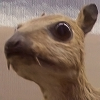

In [117]:
## write your code here
#Bullet one and two
oscar_c = Image.open('oscar.png')
oscar_c

In [118]:
#Bullet three
oscar_g = oscar_c.convert("L")
oscar_array = np.array(oscar_g)
print(oscar_array.shape)

(100, 100)


In [119]:
#Bullet 4
oscar_array[50, 50] = 0
oscar_dot = Image.fromarray(oscar_array)

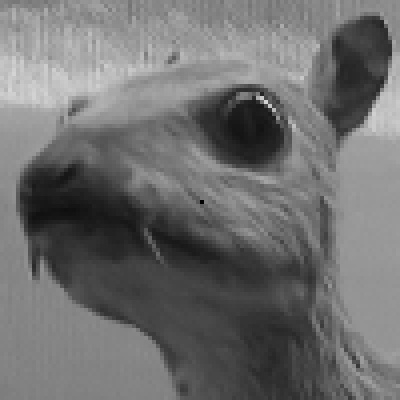

In [120]:
#Bullet 5
oscar_dot.resize((400,400))

---
### STOP
Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Finished first exercise", and push the changes to GitHub.

---

## 3. Working with numpy (3 points)

We've worked with numpy before but it's good to remember some of the basics and potentially introduce some new elements we have either forgotten or not worked with before. **Review the following code and make sure you understand all of it**.

In [121]:
import numpy as np
lst = [1,2,3]
ary = np.array(lst)      # make an array from a list
print(ary)
# 2D array, explictly set the type to float
ary2d = np.array([ [1,2,3], [4,5,6], [7,8,9], [10,11,12]], dtype=np.float64)
print(ary2d)

[1 2 3]
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


### Making arrays

There are a lot of ways to make some default arrays. You can look at the docs but here are some useful ones:

- `np.arange(start, stop, increment)` make an array with value from `start` up to *but not including* `stop` as incremented by `increment`
- `np.linspace(start, stop, count)` creates `count` values evenly spaced between `start` and `stop` *inclusive*
- you can rehape a range to a particular dimension. `np.arange(27).reshape(3,3,3)` creates a 3D array of 3 rows, each row with 3 column, each column with 3 values. The value `27` implies the range of `0,27,1`
- you can make various special arrays:
   - `np.zeros( tuple )` creates an array of zeros in the shape indicated by the tuple
   - `np.ones( tuple )` like `zeros` except fills the array with ones
   - `np.zeros_like(ary)` creates an array of the same size and shape as `ary`
   - `np.ones_like(ary)` same as `zeros_like` but with ones.
   - `np.full( tuple, value)` create an array in the shape ov `tuple` put `value` in each location

### Slicing

We can "slice" a numpy array in various ways to gather rows or columns or some subset of the numpy array which is very useful. One thing to remember is the idea of a range as indicated by the `:`. A `:` by itself is the entire index range, a value like `0:2` is the index range from 0 *up to but not including 2* . We also remember that indexing begins with 0: thus the first element in the index is at row 0. We can also use `-1` (or some other negative value) to index starting with the last value. 

We index into the array using multiple `[ ]` operators or commas in the `[ ]`. Thus `ary2d[0][1]` is the first row, 2nd value in the row. We can have as many `[ ]` operators as there are dimensions in the array. Instead of multiple `[ ]` we can also use commas within the brackets. Thus `ary2d[0,0]` and `ary2d[0][0]` are equivalent. The comma approach is typically used.

Continuing with our `array2d` from above **review the following code and make sure you understand it**:

In [122]:
slice = ary2d[:,0]  # for all rows, only the first column
print(slice)
slice = ary2d[0:2, 0:2] # rows 0 and 1, of those rows columns 0 and 1
print(slice)

[ 1.  4.  7. 10.]
[[1. 2.]
 [4. 5.]]


## More on shape

You can manipulate the shape of a numpy array, converting from say a 2x2 array to a 1D array and back. Here are some relevant methods:

- `flatten` returns a 1D array from any other numpy shape.
- `reshape` returns an array, using the provided values and shape, in the requested dimensions, assuming there are enough numbers in the original array to fill a shape of the requested size

### Exercise, 3 pts

1. Create an array of ones in the shape of  4 x 3 x 2 (4 rows, 3 columns on each row, two values at each [row,col] position)
1. Print the shape of the new array
1. Print the value of the first row, second column, second value of the array (write that expression)
1. Write code that would modify the values in the array by adding one to each value (hint, look at `flatten` and `reshape`) and print the array

In [123]:
# Bullets one through three
new_array = np.ones((4,3,2))
print(new_array.shape)
print(new_array[0,1,1])

(4, 3, 2)
1.0


In [6]:
#Bullet 4
print(new_array+1)

[[[2. 2.]
  [2. 2.]
  [2. 2.]]

 [[2. 2.]
  [2. 2.]
  [2. 2.]]

 [[2. 2.]
  [2. 2.]
  [2. 2.]]

 [[2. 2.]
  [2. 2.]
  [2. 2.]]]


---
## 4. Some Other Background Material (2 points)

### 4.1 Binary numbers

You've probably seen this before but it is worth reviewing. Numbers in python (in computers generally) are represented as binary numbers. Binary numbers consist of only the digits 0 and 1 and the positions in a binary number represent powers of 2. Below is an 8 bit number (eight 0,1 digits) and the powers of two associated with the positions.

<img src="https://sites.google.com/site/syhsmata/creative-projects/binary-numbers/Binary.png" width="500px">

As it turns out, python provides support for conversion between integers and binary (as python always does). The releveant commands are:
- `bin(some_integer)` returns a string (note the type) that is the binary representation of the integer provided
- `int(some_string, some_base)` will convert the string into an integer where the string is assumed to be of base `some_base`. 

In [124]:
i = 15
s = bin(i)
print(s)
new_i = int(s,2)
print(new_i)

0b1111
15


But the existence of the preface `0b` in the string, while helpful for us trying to read the string, is a problem for working with the string. Further, we have no control in this method for setting the length of the resulting string with leading 0s, which is convenient for our algorithms later

However, python3 string formatting is a big help here. We can return a string with leading 0s in binary format, and that string does not have the `0b` prefix. You remember python3 string formatting, correct? It looks something like the below. Note the rounding and the specification of size. 

In [8]:
s = "Pi to 6 fp places is {:.6f}".format(np.pi)
print(s)

Pi to 6 fp places is 3.141593


### Exercise 1 point

Write two functions:

`int_to_binary` that takes two arguments:

- integer to convert
- the size of the binary string returned filled, if necessary, with leading 0's 
   - that is to say, every string you produce should be exactly this size, even if leading 0's are required.
- it returns the 8-bit binary string

`binary_to_int` takes one argument
- the binary string to convert to an integer
- it returns the resulting integer

Look at the string formatting library for help

In [125]:
def int_to_binary(i,n):
    binary = '{:0{key}b}'.format(i,key=n)
    return binary

In [126]:
def binary_to_int(s):
    integer = int(s, 2)
    return integer

In [127]:
# test yourself
print(int_to_binary(15,8))
print(binary_to_int('00001111'))

00001111
15


### 4.2 Parity

The idea of parity is so easy that it seems hardly worth mentioning, but we are going to make some extensive use of it so here we go.

The parity of a number reflects whether it is even or odd. For our purposes, an odd number has a parity of 1 and an even number has a parity of 0. I told you it was simple!

### Exercise 1 point

Write two functions
- `parity` that takes a single integer as an argument and returns a 1 if the integer was odd and an 0 if the integer was even
- `set_parity` takes an existing integer and returns a possibly modified integer with specified partiy. If the provided number is already of the correct parity, the original number is returned. If not, then the value one is either added or subtracted from the original number and returned. The function takes 3 arguments:
   - the original number
   - the required parity of the returned value   
   - a high value
If the original number must be modified, one is added to the value **unless**, by adding 1, the number would be larger than the high value. In that case one is subtracted from the original number

In [128]:
# your code here
def get_parity(i):
    if i % 2 == 0:
        return 0
    else:
        return 1  

In [129]:
def set_parity(og, p, f):
    if get_parity(og) == p:
        return og
    elif og+1 > f:
        og = og-1
        return og
    else:
        og = og+1
        return og     

In [92]:
# test yourself
print(get_parity(5))
print(set_parity(5, 0, 255))

1
6


---
### STOP
Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Finished second exercise", and push the changes to GitHub.

---

## 5. Steganography (14 points)

We did all this so we could get to the real problem: image steganography. Steganography is the idea of hiding a secret message "in plain sight". That is, placing the message in a video, audio file or document that "looks" completely normal but is somehow modified to contain the message. 

In particular we are going to look at image steganography: hiding a text message in an existing image such that the image is only slightly, hopefully imperceptably, modified. We will hide the message in plain sight!

<img src="https://imgur.com/rYeGxt7.png" width="700">


The idea is fairly straight forward (look at the picture above). We loop sequentially through the pixels of an image and potentially modify those pixels in the following way:
- for an image, grab its underlying array
- for a text message, convert each letter in the message to its 8-bit binary string equivalent
- take the next three pixels in the array sequence
- based on the associated bit value of the bitstring (a 1 or a 0), check to see if the color value has the same parity as the bit in of the bitstring. If so, leave it alone. If not, add one (but not above 255, the max)
   - note the last value of the 3rd pixel is always unchanged since every character is only 8 bits longs
- do this for every letter in the message
- write a new image based on the updated array

We are going to break this up into pieces so we can test it better

### Exercise, 6 pts (3 each function)

Write two functions:

`set_triple` that does the following:
- takes as arguments an image array, a row, a column and a bitstring
- modifies the 3 pixels at the array location (row, col) to (row, col+3)
- the modification changes the parity as discussed for the values in the pixels based on the bitstring
- returns the array of the updated three pixels (not the whole array, just the array of the 3 pixels).

`get_triple` that does the following
- takes as an argument an image array, a row and a column
- it reads the parity of the 3 pixels at (row, col) to (row,col+3) as a bitstring
- returns the integer value of the decoded bitstring

### Getting these two correct is key
Getting `set_triple` and `get_triple` right is the key here. If you get those correct you can more easily code the functions below using these functions.

In [130]:
import numpy as np

In [131]:
def set_triple(array, row, column, bitstring):
    triplet = array[row, column:column+3]
    triplet = triplet.flatten()
    for i in range(len(bitstring)):
        triplet[i] = set_parity(triplet[i], int(bitstring[i]), 255)
    new = triplet.reshape((3,3))        
    return new

In [132]:
def get_triple(array, row, column):
    triplet = array[row,column:column+3]
    triplet = triplet.flatten()
    string = ''
    for i in range(len(triplet)-1):
        triplet[i] = get_parity(triplet[i])
        string +=  str(triplet[i])
    integer = binary_to_int(string)
    return integer
    
    
    

In [133]:
# test yourself
set_test = np.array([[ [5,5,5],[5,5,5],[5,5,5],[5,5,5],[5,5,5],[5,5,5],[5,5,5],[5,5,5] ]])
print(set_triple(set_test, 0,0, '00001111'))
get_test = np.array([[ [6,6,6],[6,5,5],[5,5,5],[5,5,5],[5,5,5],[5,5,5],[5,5,5],[5,5,5] ]])
print(get_triple(get_test, 0, 0))

[[6 6 6]
 [6 5 5]
 [5 5 5]]
15


### Exercise 8 points (4 each)

Write two functions:

`encode_text` that does the following:
- takes an image array, a row, a column and a text message to write into the image
- it writes a length, the number of characters in the message, as a binary string beginning at (row,col) into 3 pixels.
   - we will assume that the length can be encoded in 8 bits, meaning a message cannot be longer than 255 characters
- it then writes, as a binary string, each character in the message onto the array as described
- it returns the updated array.

`decode_text` that does the following:
- takes an image array, a row and a column
- it reads the length as an 8 bit value begining at (row,col)of the image as 8 bits
- it then reads length number of bitstrings and turns each into a separate 8 bit bitstring into a character
- it returns the message, the concatenation of the characters on the image

In [134]:
# your code here
def encode_text(a, r, c, m):
    length_m = len(m)
    b = int_to_binary(length_m, 8)
    one = set_triple(a, r, c, b)
    a[r, c:c+3] = one
    c+=3
    for c in m:
        b = int_to_binary(ord(c), 8)
        two = set_triple(a, r, c, b)
        a[r, c:c+3] = two
        c+=3
    return a  

In [135]:
def decode_text(a, r, c):
    number = get_triple(a, r, c)
    c += 3
    char = ""
    for i in range(integer):
        number = get_triple(a, r, c)
        message = chr(number)
        char += message
        c += 3
        
    return char

In [136]:
# test yourself

oscar = Image.open("oscar.png")
ary = np.array(oscar)
copy_ary = encode_text(ary, 0, 0, "hi")
print(decode_text(copy_ary, 0, 0))
steg_oscar = Image.fromarray(copy_ary)
steg_oscar.show()

TypeError: can only concatenate str (not "int") to str

---
### STOP
Take a moment to save your notebook, **add your script to your repository**, and commit the changes to your Git repository using the commit message "Finished third exercise", and push the changes to GitHub.

---

# !!! Hints !!!

Below are some hints you might pay attention to:
- the encoding (and subsequently the decoding) begins at a specific location in the image, a (row,col) location. Think of it as an encryption key! You have to know the location to decode the message.
- you need to put a length into the image as the first 8-bit value, at the starting (row,col) location. This is how many characters are encoded in the message for the decoding operation.
- when you pass a numpy array to a function, you are passing it "by reference". That is, if you change the entries in the array while in the function, those changes are reflected in the calling code (the array is changed in both places). Doing this may indeed be what you want, but be aware that it is true.
- you have written a number of functions before you get to the final `encode`/`decode` functions. Use them. If they are correct (have you tested them) you can make things easier for yourself.
- speaking of testing, there are small tests after the functions. Run the little tests and see if you get what you expected
- **BIG HINT** I intentionally made the functions pass arrays around. This is so you can test with **much smaller fake arrays**. Make up an array (of the right shape of course) that are **very small**, so small that you can observe if your code is correct or not. If you start testing with real images, things are probably going to be messy. Up to you, but when you ask for help the TAs/LAs are going to want to see how your code tested on something they can read.
   - also, test with **small** messages (like 2 chars) so you can see what's going on. Testing is very important!

---
### Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [115]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.gle/42KmqotDw3VTun5y6" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework #3, and upload your notebook **and the script you wrote**.

&#169; Copyright 2020,  Michigan State University Board of Trustees